In [96]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
from itertools import groupby
import squarify
import warnings
import networkx as nx
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [2]:
warnings.filterwarnings('ignore')
os.chdir("A:\\Project\\ProjectWork")

In [161]:
word_df = pd.read_csv("Market_Basket_Optimisation.csv",header=None)

In [162]:
word_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,frozen vegetables,spaghetti,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
word_list = []
sentence_words = ''
for i in word_df:
    for j in range(len(word_df)):
        if str(word_df[i][j]) != 'nan':
            word_list.append(str(word_df[i][j]))
            sentence_words = sentence_words + str(word_df[i][j]).lower()

# Data Exploration

In [164]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
    
wine_mask = np.array(Image.open("wine_mask_xgk1tq.png"))
# Transform your mask into a new one that will work with the function:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

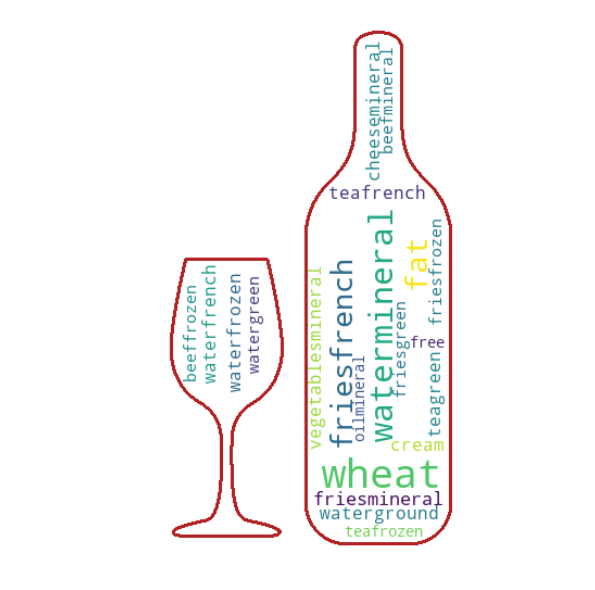

In [172]:
## Generating Word Count
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', mask=transformed_wine_mask,contour_color='firebrick',contour_width=3,
                min_font_size = 10).generate(sentence_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud,interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [166]:
df = pd.DataFrame({'freq': word_list})
df = df.groupby("freq").size().reset_index(name='Size')
df['Support'] = df['Size']/len(word_df)

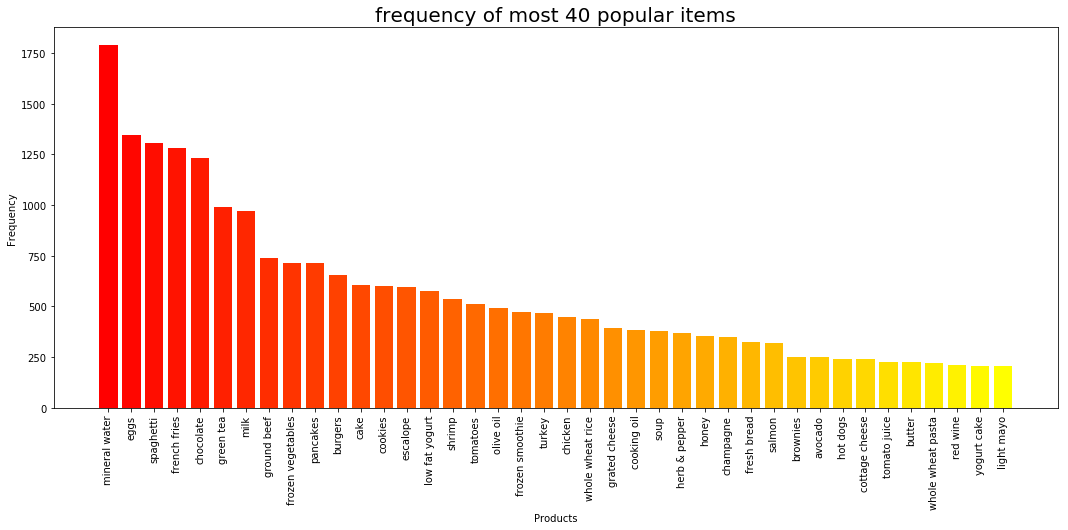

In [167]:
df = df.sort_values(by=["Size"],ascending=False)
plt.rcParams['figure.figsize'] = (18, 7)
dfcolor = plt.cm.autumn(np.linspace(0, 1, 40))
plt.bar(df['freq'].head(40),df['Size'].head(40),color=dfcolor)
plt.title('frequency of most 40 popular items', fontsize = 20)
plt.xlabel("Products")
plt.ylabel("Frequency")
plt.xticks(rotation = 90 )
plt.show()

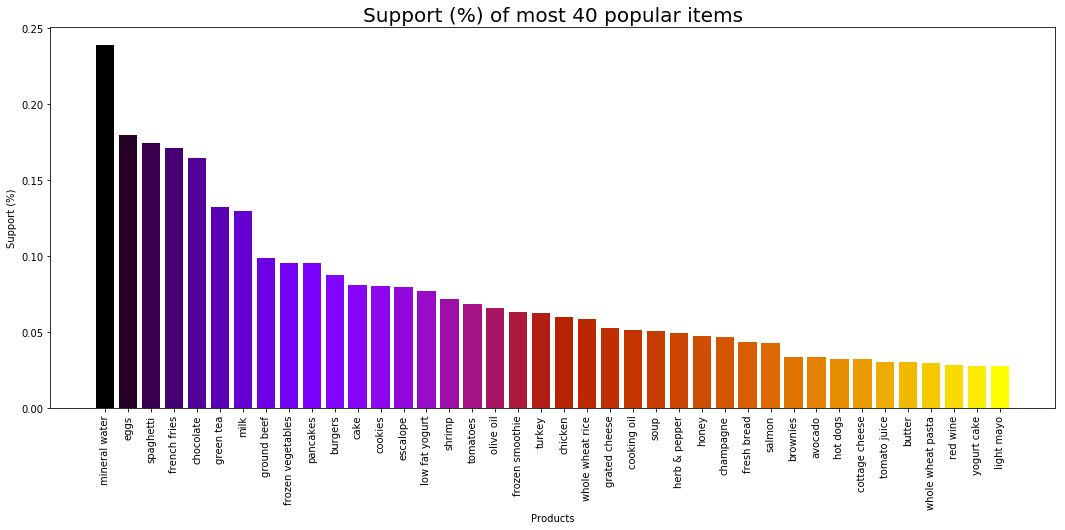

In [168]:
df = df.sort_values(by=["Support"],ascending=False)
plt.rcParams['figure.figsize'] = (18, 7)
dfcolor = plt.cm.gnuplot(np.linspace(0, 1, 40))
plt.bar(df['freq'].head(40),df['Support'].head(40),color=dfcolor)
plt.title('Support (%) of most 40 popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.xlabel("Products")
plt.ylabel("Support (%)")
plt.show()

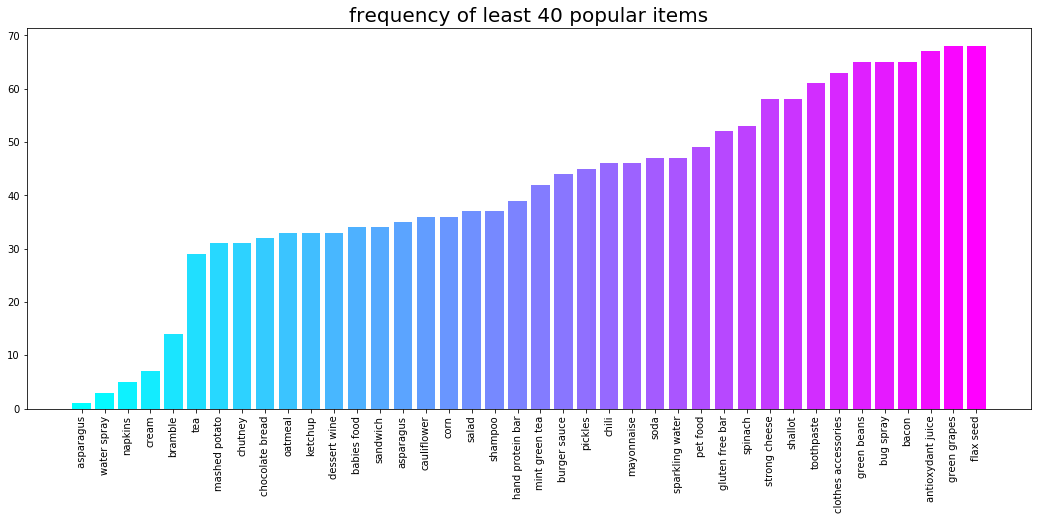

In [169]:
df = df.sort_values(by=["Size"],ascending=True)
plt.rcParams['figure.figsize'] = (18, 7)
dfcolor = plt.cm.cool(np.linspace(0, 1, 40))
plt.bar(df['freq'].head(40),df['Size'].head(40),color=dfcolor)
plt.title('frequency of least 40 popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.show()

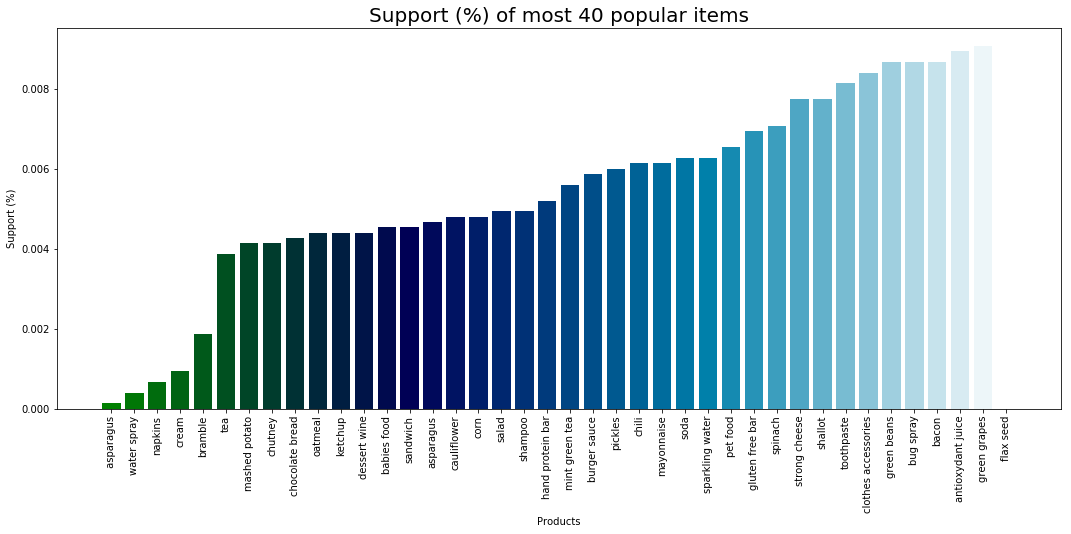

In [173]:
df = df.sort_values(by=["Support"],ascending=True)
plt.rcParams['figure.figsize'] = (18, 7)
dfcolor = plt.cm.ocean(np.linspace(0, 1, 40))
plt.bar(df['freq'].head(40),df['Support'].head(40),color=dfcolor)
plt.title('Support (%) of most 40 popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.xlabel("Products")
plt.ylabel("Support (%)")
plt.show()

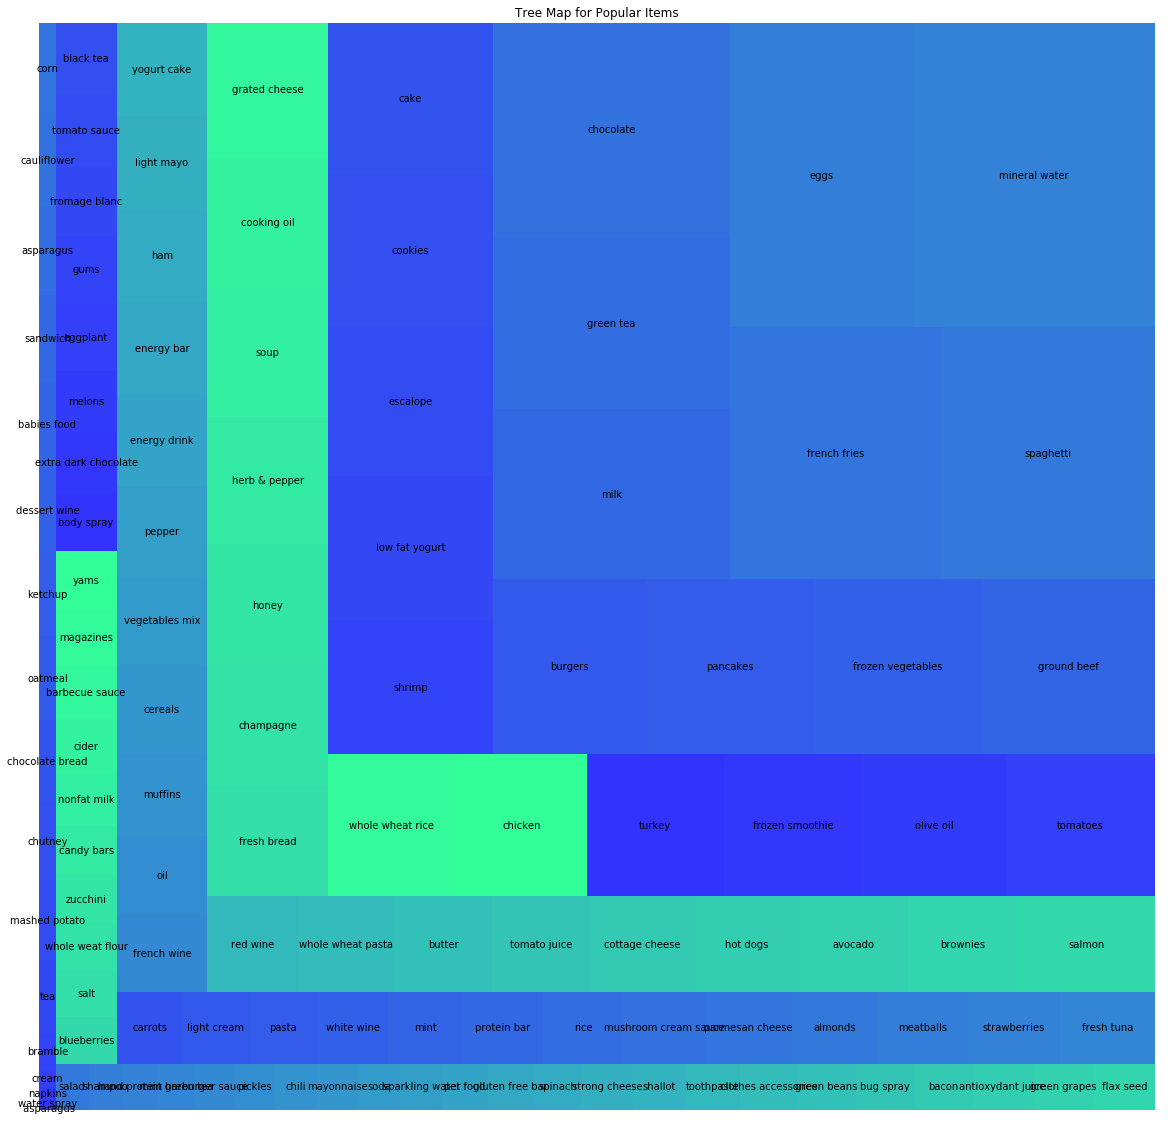

In [111]:
plt.rcParams['figure.figsize'] = (20, 20)
color = plt.cm.winter(np.linspace(0, 1, 50))
squarify.plot(sizes = df['Size'], label = df['freq'], alpha=.8, color = color)
plt.title('Tree Map for Popular Items')
plt.axis('off')
plt.show()

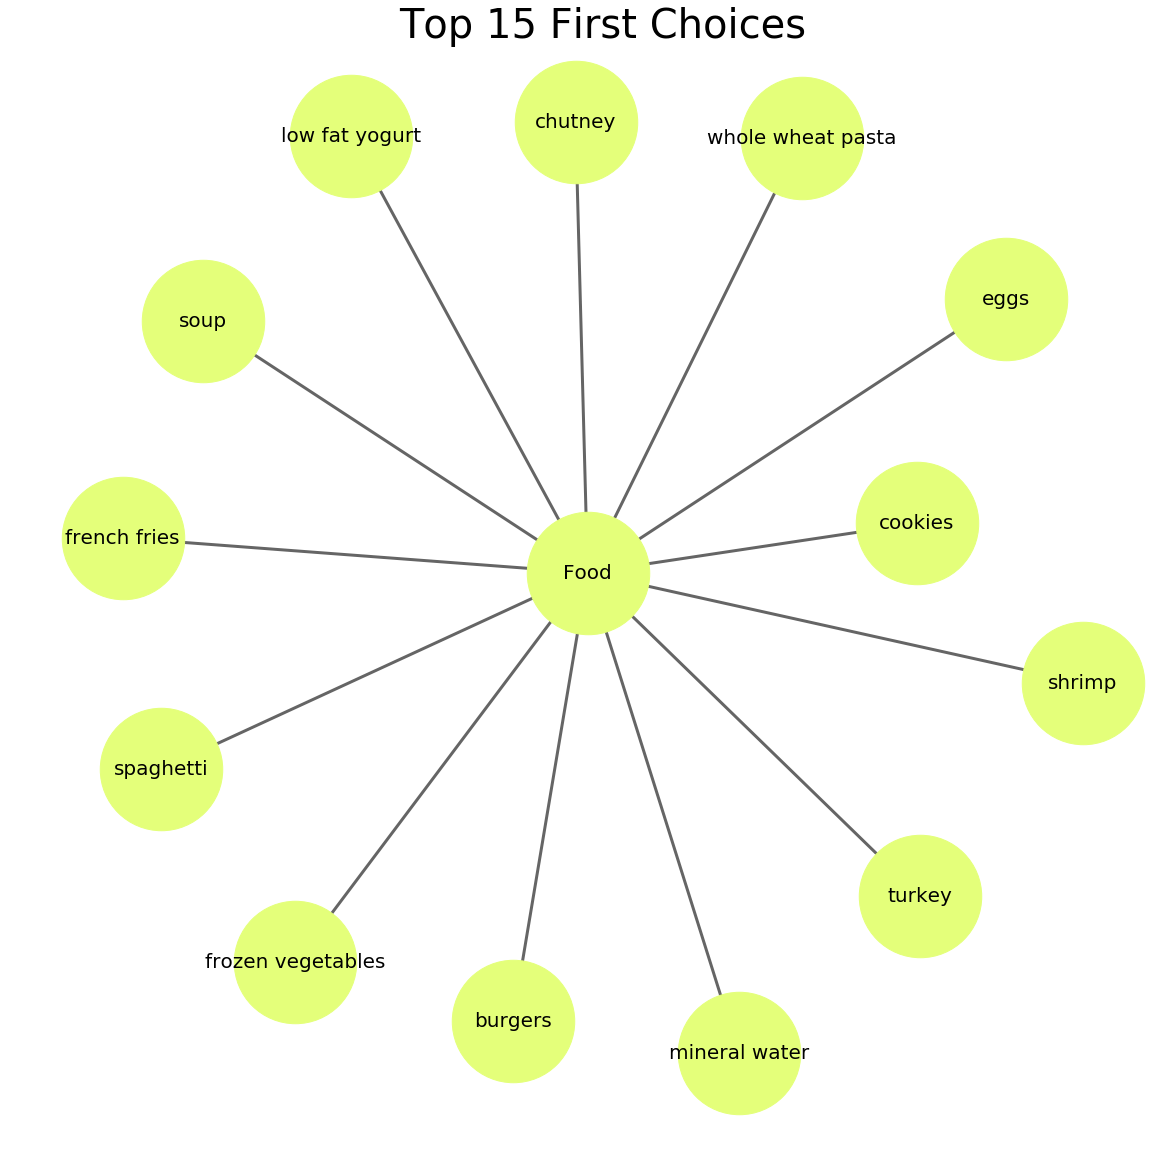

In [112]:
word_df['food'] = 'Food'
food = word_df.truncate(after = 15)
food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)
plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(food)
color = plt.cm.Wistia(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 40)
plt.show()

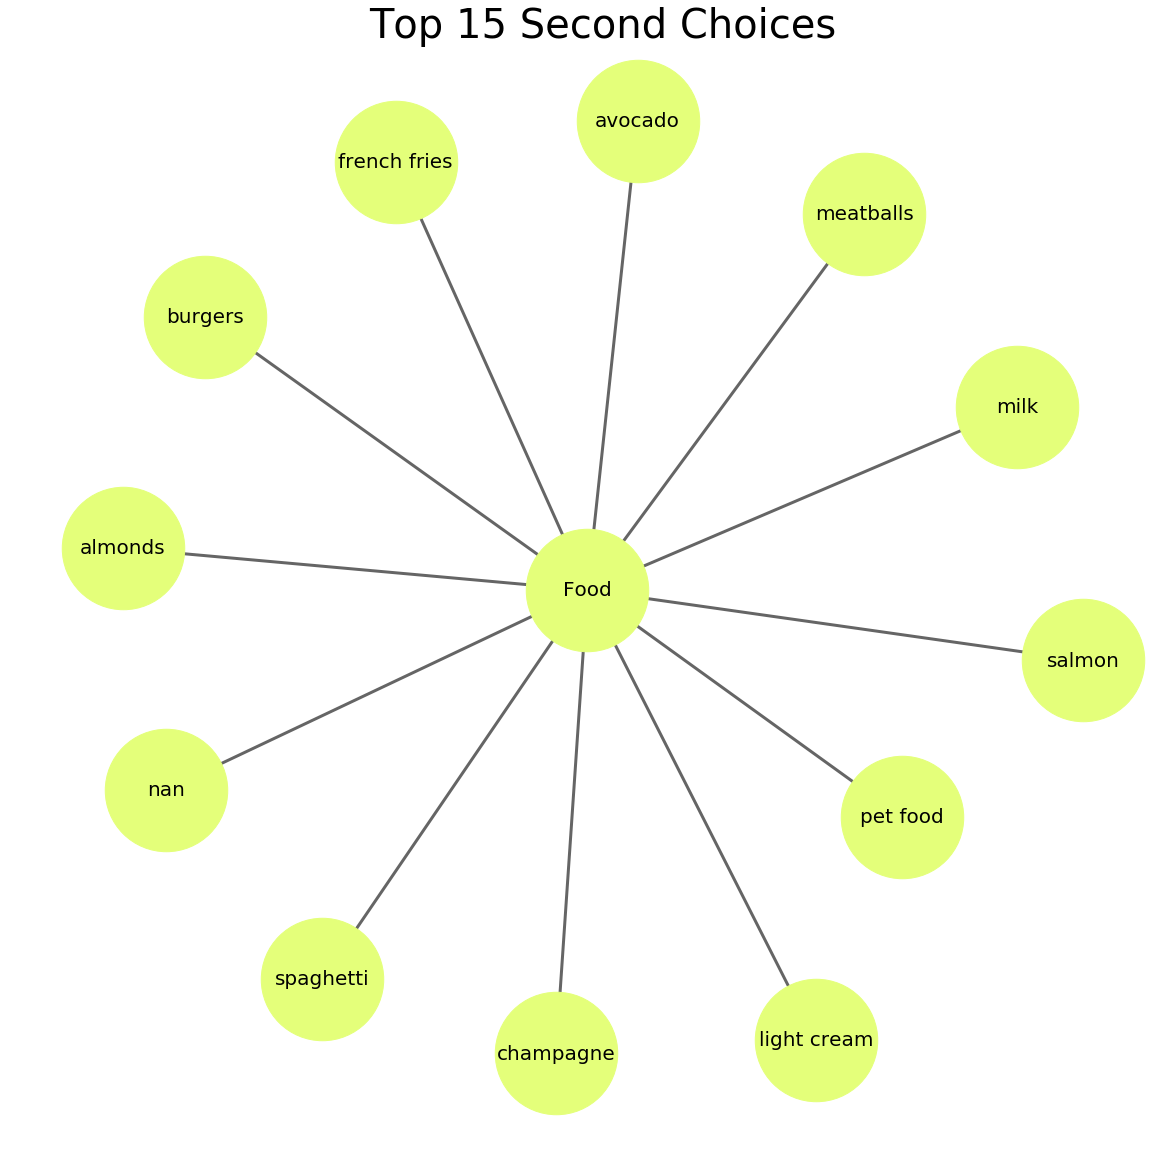

In [113]:
food = word_df.truncate(after = 15)
food = nx.from_pandas_edgelist(food, source = 'food', target = 1, edge_attr = True)
plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(food)
color = plt.cm.Wistia(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 Second Choices', fontsize = 40)
plt.show()

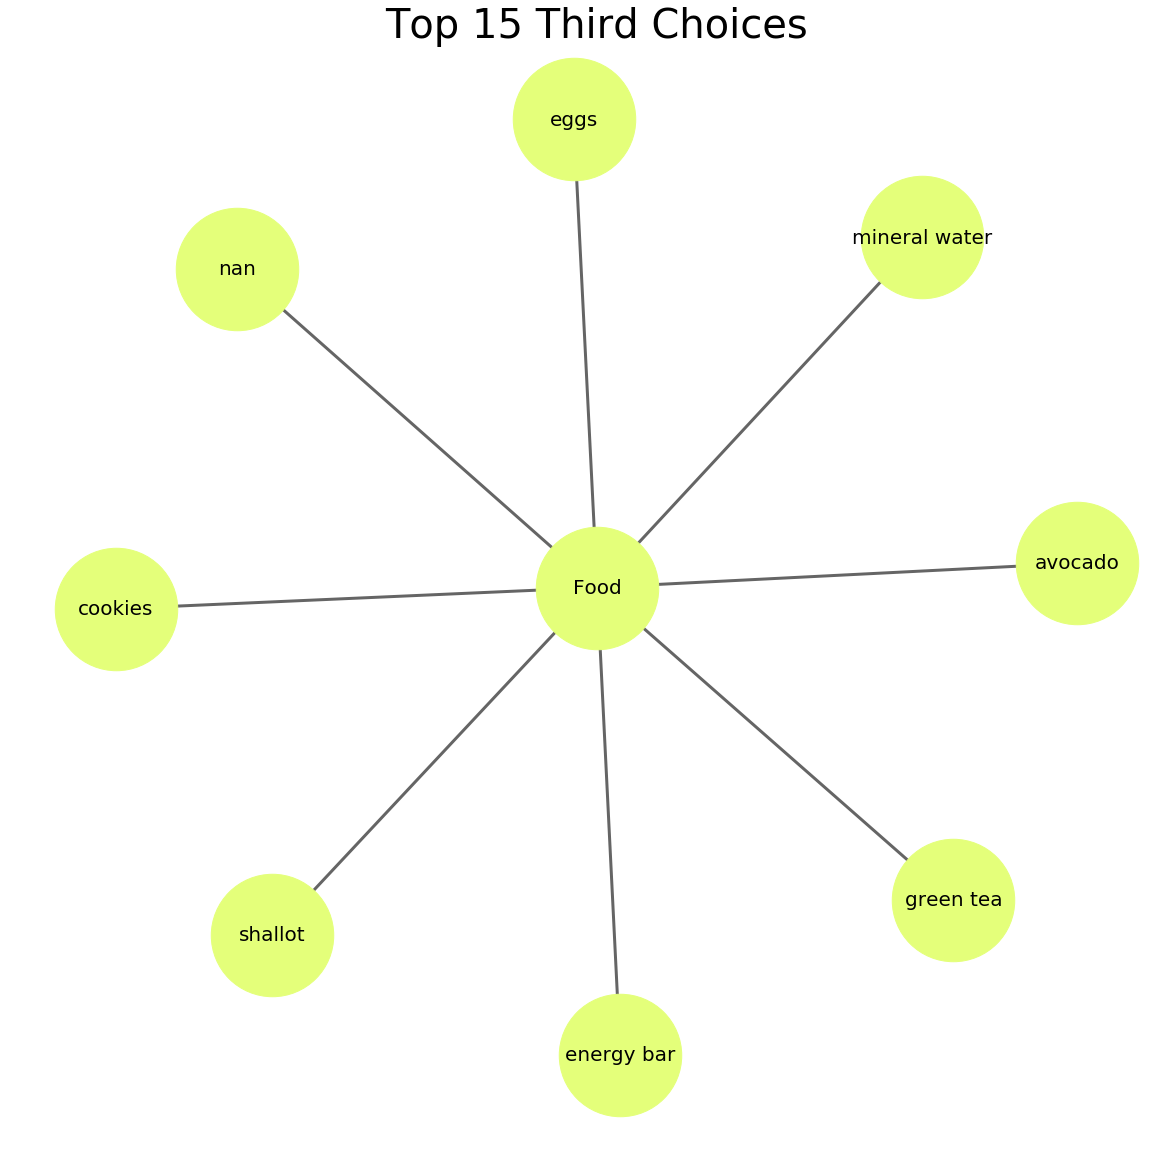

In [114]:
food = word_df.truncate(after = 15)
food = nx.from_pandas_edgelist(food, source = 'food', target = 2, edge_attr = True)
plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(food)
color = plt.cm.Wistia(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 Third Choices', fontsize = 40)
plt.show()

# Data preprocessing

In [144]:
# making each customers shopping items an identical list
word_list1 = []
for i in range(len(word_df)):
    word_list1.append([str(word_df.values[i,j]) for j in range(0, 20)])

In [47]:
word_array = np.array(word_list1)
print(word_array.shape)

(7501, 20)


In [48]:
te = TransactionEncoder()
data = te.fit_transform(word_array)
data = pd.DataFrame(data, columns = te.columns_)

# getting the shape of the data
data.shape

(7501, 121)

In [70]:
data.head(5)

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [79]:
#Now, let us return the items and itemsets with at least 5% support:
frequent_itemsets = apriori(data, min_support = 0.08, use_colnames = True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.087188,(burgers),1
1,0.081056,(cake),1
2,0.163845,(chocolate),1
3,0.080389,(cookies),1
4,0.179709,(eggs),1
5,0.170911,(french fries),1
6,0.095321,(frozen vegetables),1
7,0.132116,(green tea),1
8,0.098254,(ground beef),1
9,0.129583,(milk),1


In [80]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.08) ]

,support,itemsets,length
14,0.087188,"(nan, burgers)",2
15,0.081056,"(cake, nan)",2
16,0.163845,"(nan, chocolate)",2
17,0.080389,"(nan, cookies)",2
18,0.179709,"(nan, eggs)",2
19,0.170911,"(nan, french fries)",2
20,0.095321,"(frozen vegetables, nan)",2
21,0.131982,"(green tea, nan)",2
22,0.098254,"(ground beef, nan)",2
23,0.129583,"(milk, nan)",2


In [83]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'salmon', 'mineral water'} ]

,support,itemsets,length


In [84]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'mineral water'} ]


,support,itemsets,length
10,0.238368,(mineral water),1
